In [ ]:
### Disable cuda
!pip install tensorflow[and-cuda]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 MB 544.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 2.0 MB/s eta 0:00:00
  Preparing metadata 

In [ ]:
# import os

# # Disable all GPUs
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf

# Verify that GPU is not being used
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


### Loading Relevant Libraries

In [ ]:
!pip install kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:01<00:00, 100MB/s]
100% 163M/163M [00:01<00:00, 91.9MB/s]
The dataset is extracted


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.models import Sequential,save_model,Sequential,load_model
from tensorflow.keras.utils import img_to_array,load_img
import os
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_directory = r'/content/data'

In [ ]:
categories = ['with_mask','without_mask']

In [ ]:
height,width = 150,150

In [ ]:
data = []
labels = []

In [ ]:
for category_id,category in enumerate(categories):
    category_folder = os.path.join(data_directory,category)
    if os.path.isdir(category_folder):
        for image_name in os.listdir(category_folder):
            image = os.path.join(category_folder,image_name)
            image = load_img(image,target_size=(height,width))
            image = img_to_array(image) / 255.0
            data.append(image)
            labels.append(category_id)


In [ ]:
data

[array([[[0.7529412 , 0.7529412 , 0.78431374],
         [0.7529412 , 0.7529412 , 0.78431374],
         [0.7529412 , 0.7529412 , 0.78431374],
         ...,
         [0.7607843 , 0.7607843 , 0.7921569 ],
         [0.70980394, 0.70980394, 0.7411765 ],
         [0.6509804 , 0.6509804 , 0.68235296]],
 
        [[0.7529412 , 0.7529412 , 0.78431374],
         [0.7529412 , 0.7529412 , 0.78431374],
         [0.7529412 , 0.7529412 , 0.78431374],
         ...,
         [0.7647059 , 0.7647059 , 0.79607844],
         [0.70980394, 0.70980394, 0.7411765 ],
         [0.6509804 , 0.6509804 , 0.68235296]],
 
        [[0.75686276, 0.75686276, 0.7882353 ],
         [0.75686276, 0.75686276, 0.7882353 ],
         [0.75686276, 0.75686276, 0.7882353 ],
         ...,
         [0.76862746, 0.76862746, 0.8       ],
         [0.7176471 , 0.7176471 , 0.7490196 ],
         [0.65882355, 0.65882355, 0.6901961 ]],
 
        ...,
 
        [[0.5019608 , 0.45882353, 0.4745098 ],
         [0.4392157 , 0.40392157, 0.41568

In [ ]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
data = np.array(data)
print(data)

[[[[0.7529412  0.7529412  0.78431374]
   [0.7529412  0.7529412  0.78431374]
   [0.7529412  0.7529412  0.78431374]
   ...
   [0.7607843  0.7607843  0.7921569 ]
   [0.70980394 0.70980394 0.7411765 ]
   [0.6509804  0.6509804  0.68235296]]

  [[0.7529412  0.7529412  0.78431374]
   [0.7529412  0.7529412  0.78431374]
   [0.7529412  0.7529412  0.78431374]
   ...
   [0.7647059  0.7647059  0.79607844]
   [0.70980394 0.70980394 0.7411765 ]
   [0.6509804  0.6509804  0.68235296]]

  [[0.75686276 0.75686276 0.7882353 ]
   [0.75686276 0.75686276 0.7882353 ]
   [0.75686276 0.75686276 0.7882353 ]
   ...
   [0.76862746 0.76862746 0.8       ]
   [0.7176471  0.7176471  0.7490196 ]
   [0.65882355 0.65882355 0.6901961 ]]

  ...

  [[0.5019608  0.45882353 0.4745098 ]
   [0.4392157  0.40392157 0.41568628]
   [0.3529412  0.3372549  0.34117648]
   ...
   [0.6039216  0.5647059  0.56078434]
   [0.54509807 0.5058824  0.5019608 ]
   [0.5686275  0.5294118  0.5254902 ]]

  [[0.57254905 0.53333336 0.5372549 ]
   [0.4

In [ ]:
labels = np.array(labels)
print(labels)

[0 0 0 ... 1 1 1]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2)

In [ ]:
from tensorflow.keras.layers import Dropout
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(width, height, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),  # Dropout added here
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout added here
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 146, 146, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 32)        0         
 D)                                                              
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
189/189 [==============================] - 22s 76ms/step - loss: 1.3813 - accuracy: 0.7797 - val_loss: 69.1462 - val_accuracy: 0.5314
Epoch 2/20
189/189 [==============================] - 12s 64ms/step - loss: 0.5531 - accuracy: 0.8054 - val_loss: 51.2610 - val_accuracy: 0.5758
Epoch 3/20
189/189 [==============================] - 12s 63ms/step - loss: 0.5661 - accuracy: 0.8224 - val_loss: 0.4090 - val_accuracy: 0.8557
Epoch 4/20
189/189 [==============================] - 12s 64ms/step - loss: 0.3607 - accuracy: 0.8544 - val_loss: 0.2729 - val_accuracy: 0.8895
Epoch 5/20
189/189 [==============================] - 12s 64ms/step - loss: 0.3337 - accuracy: 0.8754 - val_loss: 1.4524 - val_accuracy: 0.7975
Epoch 6/20
189/189 [==============================] - 12s 65ms/step - loss: 0.2918 - accuracy: 0.8780 - val_loss: 0.4333 - val_accuracy: 0.8974
Epoch 7/20
189/189 [==============================] - 12s 64ms/step - loss: 0.2812 - accuracy: 0.8721 - val_loss: 0.2642 - val_accurac

In [ ]:
model.save('face_mask_detection.h5')

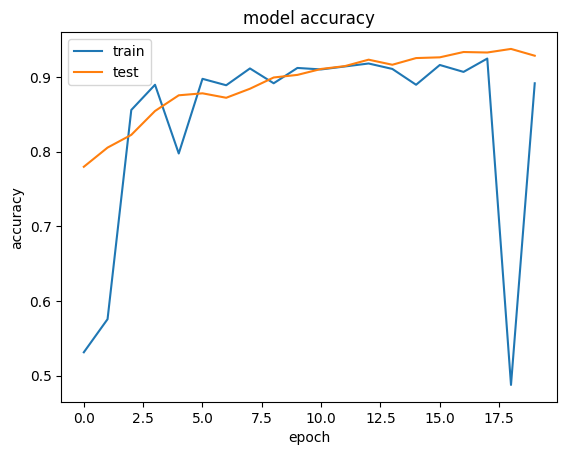

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

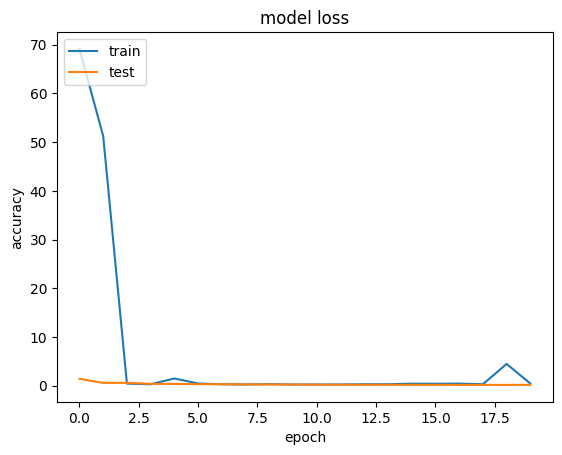

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

model = Sequential([
    Conv2D(32, (3, 3), input_shape=(width, height, 3)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Conv2D(32, (3, 3)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D(),
    Dropout(0.25),  # Dropout layer added
    Flatten(),
    Dense(32),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dropout(0.5),  # Dropout layer added
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr, model_checkpoint])


Epoch 1/50
189/189 [==============================] - 20s 87ms/step - loss: 0.3275 - accuracy: 0.8630 - val_loss: 0.5663 - val_accuracy: 0.6539 - lr: 0.0010
Epoch 2/50
189/189 [==============================] - 13s 69ms/step - loss: 0.2299 - accuracy: 0.9113 - val_loss: 0.2599 - val_accuracy: 0.8968 - lr: 0.0010
Epoch 3/50
189/189 [==============================] - 13s 70ms/step - loss: 0.1809 - accuracy: 0.9313 - val_loss: 0.2364 - val_accuracy: 0.9014 - lr: 0.0010
Epoch 4/50
189/189 [==============================] - 14s 74ms/step - loss: 0.1504 - accuracy: 0.9412 - val_loss: 0.2047 - val_accuracy: 0.9226 - lr: 0.0010
Epoch 5/50
189/189 [==============================] - 13s 70ms/step - loss: 0.1125 - accuracy: 0.9601 - val_loss: 0.1879 - val_accuracy: 0.9312 - lr: 0.0010
Epoch 6/50
189/189 [==============================] - 13s 69ms/step - loss: 0.0932 - accuracy: 0.9677 - val_loss: 0.2148 - val_accuracy: 0.9305 - lr: 0.0010
Epoch 7/50
189/189 [==============================] - 13s 

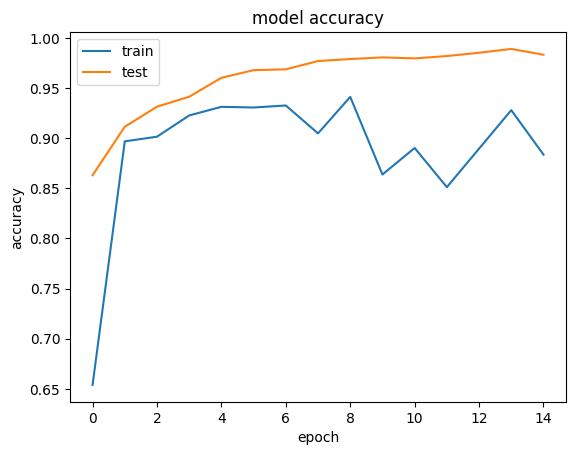

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

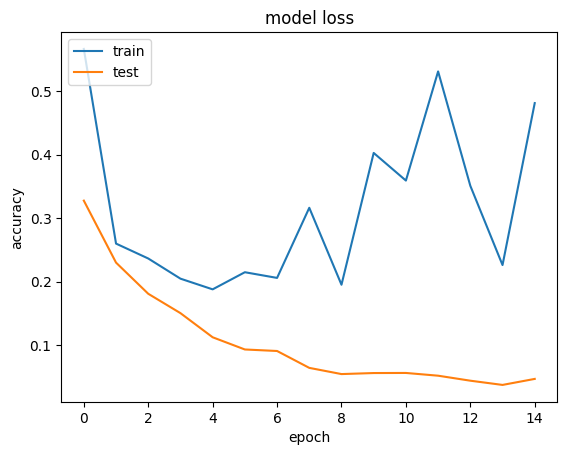

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()